## Big Home Assignment 3

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, classification_report

In [3]:
heart_attack_data = pd.read_csv("datasets_bigHA/heart_attack.csv", sep=',')
heart_attack_data.shape, heart_attack_data, heart_attack_data.isnull().sum()

((303, 14),
      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
 0     63    1   3     145   233    1        0       150     0      2.3    0   
 1     37    1   2     130   250    0        1       187     0      3.5    0   
 2     41    0   1     130   204    0        0       172     0      1.4    2   
 3     56    1   1     120   236    0        1       178     0      0.8    2   
 4     57    0   0     120   354    0        1       163     1      0.6    2   
 ..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
 298   57    0   0     140   241    0        1       123     1      0.2    1   
 299   45    1   3     110   264    0        1       132     0      1.2    1   
 300   68    1   0     144   193    1        1       141     0      3.4    1   
 301   57    1   0     130   131    0        1       115     1      1.2    1   
 302   57    0   1     130   236    0        0       174     0      0.0    1   
 
      caa  thall  output  

In [4]:
quality_of_wine_data = pd.read_csv("datasets_bigHA/quality_of_wine.csv", sep=',')
quality_of_wine_data.shape, quality_of_wine_data, quality_of_wine_data.isnull().sum()

((32485, 14),
        Unnamed: 0  fixed acidity  volatile acidity  citric acid  \
 0            2732            7.4             0.170         0.29   
 1            2607            5.3             0.310         0.38   
 2            1653            4.7             0.145         0.29   
 3            3264            6.9             0.260         0.29   
 4            4931            6.4             0.450         0.07   
 ...           ...            ...               ...          ...   
 32480        2838            5.0             0.255         0.22   
 32481        6414            6.6             0.360         0.52   
 32482        1126            6.3             0.200         0.24   
 32483        2924            6.2             0.200         0.33   
 32484        5462            8.1             0.280         0.46   
 
        residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
 0                 1.4      0.047                 23.0                 107.0   
 1      

In [66]:
data_scientists_job_change_data = pd.read_csv("datasets_bigHA/Job_Change_of_Data_Scientists.csv", sep=',')
data_scientists_job_change_data.shape, data_scientists_job_change_data, data_scientists_job_change_data.isnull().sum()

((19158, 14),
        enrollee_id      city  city_development_index gender  \
 0             8949  city_103                   0.920   Male   
 1            29725   city_40                   0.776   Male   
 2            11561   city_21                   0.624    NaN   
 3            33241  city_115                   0.789    NaN   
 4              666  city_162                   0.767   Male   
 ...            ...       ...                     ...    ...   
 19153         7386  city_173                   0.878   Male   
 19154        31398  city_103                   0.920   Male   
 19155        24576  city_103                   0.920   Male   
 19156         5756   city_65                   0.802   Male   
 19157        23834   city_67                   0.855    NaN   
 
            relevent_experience enrolled_university education_level  \
 0      Has relevent experience       no_enrollment        Graduate   
 1       No relevent experience       no_enrollment        Graduate   
 2 

In [67]:
data_scientists_job_change_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## Preprocessing

In [68]:
data_scientists_job_change_data.columns = ['enrollee_id', 'city_nom', 'city_development_index', 'gender_nom',
       'relevent_experience_nom', 'enrolled_university_nom', 'education_level_ord',
       'major_discipline_nom', 'experience_ord', 'company_size_ord', 'company_type_nom',
       'last_new_job_ord', 'training_hours', 'target']

In [69]:
del data_scientists_job_change_data["enrollee_id"]

In [70]:
def OrdMapping(df):
    
    
    education_level_ord_mapping = {'Primary School': 0,'High School': 1,'Graduate': 2 , 'Masters':3,'Phd': 4 }
    experience_ord_mapping= {'<1':0, '1':2, '2':3, '3':4,'4':5, '5':6, '6':7, '7':8, '8':9,'9':10, '10':11, '12':13, '13':14,'14':15, '15':16, '16':17,  '17':18,'18':19, '19':20,'20':21,'>20':22}
    company_size_ord_mapping = {'<10':0 ,'10/49':1,'50-99':2, '100-500':3, '500-999':4, '1000-4999':5,'5000-9999':6, '10000+':7}
    
    last_new_job_ord_mapping = {'never':0,'1':1,'2':2,'3':3,'4':4,'>4':5}
    df['education_level_ord'] = df.education_level_ord.map(education_level_ord_mapping)
    df['experience_ord'] = df.experience_ord.map(experience_ord_mapping)
    df['company_size_ord'] = df.company_size_ord.map(company_size_ord_mapping)
    df['last_new_job_ord'] = df.last_new_job_ord.map(last_new_job_ord_mapping)
     
    return df

In [71]:
data_scientists_job_change_data = OrdMapping(data_scientists_job_change_data)

In [72]:
ordinals = [c for c in data_scientists_job_change_data.columns if 'ord' in c]
nominals = [c for c in data_scientists_job_change_data.columns if 'nom' in c]

In [73]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler

for c in nominals:
    le = LabelEncoder()
    le.fit(list(data_scientists_job_change_data[c].astype(str)))
    data_scientists_job_change_data[c] = le.transform(data_scientists_job_change_data[c].astype(str))
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('target mapping :  ',c ,  le_name_mapping)

target mapping :   city_nom {'city_1': 0, 'city_10': 1, 'city_100': 2, 'city_101': 3, 'city_102': 4, 'city_103': 5, 'city_104': 6, 'city_105': 7, 'city_106': 8, 'city_107': 9, 'city_109': 10, 'city_11': 11, 'city_111': 12, 'city_114': 13, 'city_115': 14, 'city_116': 15, 'city_117': 16, 'city_118': 17, 'city_12': 18, 'city_120': 19, 'city_121': 20, 'city_123': 21, 'city_126': 22, 'city_127': 23, 'city_128': 24, 'city_129': 25, 'city_13': 26, 'city_131': 27, 'city_133': 28, 'city_134': 29, 'city_136': 30, 'city_138': 31, 'city_139': 32, 'city_14': 33, 'city_140': 34, 'city_141': 35, 'city_142': 36, 'city_143': 37, 'city_144': 38, 'city_145': 39, 'city_146': 40, 'city_149': 41, 'city_150': 42, 'city_152': 43, 'city_155': 44, 'city_157': 45, 'city_158': 46, 'city_159': 47, 'city_16': 48, 'city_160': 49, 'city_162': 50, 'city_165': 51, 'city_166': 52, 'city_167': 53, 'city_171': 54, 'city_173': 55, 'city_175': 56, 'city_176': 57, 'city_179': 58, 'city_18': 59, 'city_180': 60, 'city_19': 61,

In [74]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

cats = ordinals + nominals

imp = SimpleImputer(strategy = "most_frequent")
data_scientists_job_change_data[cats] = imp.fit_transform(data_scientists_job_change_data[cats])

In [75]:
data_scientists_job_change_data.isnull().sum()

city_nom                   0
city_development_index     0
gender_nom                 0
relevent_experience_nom    0
enrolled_university_nom    0
education_level_ord        0
major_discipline_nom       0
experience_ord             0
company_size_ord           0
company_type_nom           0
last_new_job_ord           0
training_hours             0
target                     0
dtype: int64

In [76]:
nums = [c for c in data_scientists_job_change_data.columns if c not in cats and c != "target"]

In [77]:
ss = StandardScaler()
data_scientists_job_change_data[nums] = ss.fit_transform(data_scientists_job_change_data[nums])

In [78]:
data_scientists_job_change_data.shape, data_scientists_job_change_data, data_scientists_job_change_data.isnull().sum()

((19158, 13),
        city_nom  city_development_index  gender_nom  relevent_experience_nom  \
 0           5.0                0.738919         1.0                      0.0   
 1          77.0               -0.428410         1.0                      1.0   
 2          64.0               -1.660590         3.0                      1.0   
 3          14.0               -0.323026         3.0                      1.0   
 4          50.0               -0.501368         1.0                      0.0   
 ...         ...                     ...         ...                      ...   
 19153      55.0                0.398448         1.0                      1.0   
 19154       5.0                0.738919         1.0                      0.0   
 19155       5.0                0.738919         1.0                      0.0   
 19156      94.0               -0.217642         1.0                      0.0   
 19157      95.0                0.212000         3.0                      1.0   
 
        enro

## Preparing functions to perform classification on our selected data using Lacy FCA Algorithm.

In [18]:
import fcalc1 as fcalc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import Binarizer, LabelEncoder

def fcalc_cross_validation(method, alpha, data, target, folds=5, verbose=0, interval_constructor=None):
    """
    Cross validation for counting Lazy FCA classifier avarage accuracy.
    Arguments:
        data (pandas.DataFrame) -- data frame with data for counting avarage accuracy
        folds (int) -- number of folds for cross validation
        verbose (int) -- value for controling logging, if 0 won't log anything otherwise print computation steps
        interval_constructor (method) -- method for computing interval (default None)
    Return: 
        avarage accuracy (float) -- return avarage accuracy for all folds
        avarage f1 score (float) -- return avarage f1 score for all folds
    """
    accuracies = np.array([])
    f1_scores = np.array([])
    fold_size = int(np.ceil(data.shape[0] / folds))

    for i in range(0, data.shape[0], fold_size):
        X_train = pd.concat([data.iloc[: i], data.iloc[i + fold_size:]])
        y_train = pd.concat([target.iloc[: i], target.iloc[i + fold_size:]])

        X_test = data.iloc[i : i + fold_size]
        y_test = target.iloc[i : i + fold_size]

        if verbose:
            print(f"Fold {i // fold_size + 1}")
        bin_cls = fcalc.classifier.BinarizedBinaryClassifier(X_train.values, y_train.to_numpy(), method=method, alpha=alpha)
        prediction = bin_cls.predict(X_test.values)

        accuracy = accuracy_score(y_test, bin_cls.predictions)
        f1 = f1_score(y_test, bin_cls.predictions, average='macro')

        accuracies = np.append(accuracies, accuracy)
        f1_scores = np.append(f1_scores, f1)
        if verbose:
            print("Accuracy for fold %d is %.2f \n"%(i // fold_size + 1, accuracy))
            print("F1 Score for fold %d is %.2f \n"%(i // fold_size + 1, f1))

    return np.average(accuracies), np.average(f1_scores)

In [19]:
def fcals_performer(X_train, y_train, X_test, y_test, methods=["standard", "standard-support", "ratio-support"], alphas=[0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1., 1.2]):
    best_acc = 0
    best_method = "standard"
    best_alpha = 0.

    for method in methods:
        for alpha in alphas:
            acc, f1 = fcalc_cross_validation(method, alpha, X_train, y_train, verbose=1)
           
            print(f"Accuracy for fcalc(method={method}, alpha={alpha}): {acc}")
            print(f"F1 Score for fcalc(method={method}, alpha={alpha}): {f1}")

            if (acc > best_acc):
                best_acc = acc
                best_method = method
                best_alpha = alpha
    
    bin_cls = fcalc.classifier.BinarizedBinaryClassifier(X_train.values, y_train.to_numpy(), method=best_method, alpha=best_alpha)
    prediction = bin_cls.predict(X_test.values)
    best_accuracy = accuracy_score(y_test, bin_cls.predictions)
    best_f1 = f1_score(y_test, bin_cls.predictions, average='macro')

    print("========================================================================")
    print(f"fcalc(method={best_method}, alpha={best_alpha}) test Accuracy: {best_accuracy}")
    print(f"fcalc(method={best_method}, alpha={best_alpha}) test F1 Score: {best_f1}")

## Features choosing
Now it is high time to take just importaint features. We'll do this with the help of xjboost

In [20]:
from xgboost import XGBClassifier

def xGboost_flow(X_train, X_test, y_train, y_test, n_estimators=500, max_depth=5, 
                 learning_rate=0.5, colsample_bytree=0.70, n_jobs=4, objective='binary:logistic'):
    best_f1_score = 0.5
    best_learning_rate = learning_rate
    
    while learning_rate > 0.01:
        classifier = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, 
                               learning_rate=learning_rate, objective=objective, 
                               colsample_bytree=colsample_bytree, n_jobs=n_jobs)
        accuracies = cross_val_score(classifier, X_train, y_train, scoring="accuracy", cv = 5)
        print(f"accuracy mean value: {accuracies.mean()}")
        print(f"accuracy STD value: {accuracies.std()}")
        print(f"========================================")
        
        if accuracies.mean() < best_f1_score:
            best_f1_score = accuracies.mean()
            best_learning_rate = learning_rate
            
        learning_rate -= 0.05
    
    final_classifier = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, 
                               learning_rate=best_learning_rate, objective=objective, 
                               colsample_bytree=colsample_bytree, n_jobs=n_jobs)
    final_classifier.fit(X_train, y_train)
    
    importances = final_classifier.feature_importances_
    
    feature_names = X_train.columns
    feature_importances = sorted(zip(importances, feature_names), reverse=True)

    print("Feature importances:")
    for importance, name in feature_importances:
        print(f"{name}: {importance}")

    
    # Visualisation of feature importance
    plt.figure(figsize=(17, 10))
    sorted_idx = np.argsort(final_classifier.feature_importances_)[::-1]
    sns.barplot(x=final_classifier.feature_importances_[sorted_idx], y=X_train.columns[sorted_idx])
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title('Visualizing Important Features')
    plt.show()
    
    print(f"XgBoost test Accuracy: {final_classifier.score(X_test, y_test)}")
    print(f"XgBoost test F1 Score\n: {classification_report(y_test, final_classifier.predict(X_test))}")

## Heart attacks data analysis:

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()

heart_attack_target = heart_attack_data['output']
heart_attack_new_data = heart_attack_data.drop(columns = ['output'], axis = 1)

for col in heart_attack_new_data.columns:
    le.fit(heart_attack_new_data[col])
    heart_attack_new_data[col] = le.transform(heart_attack_new_data[col])

heart_attack_X_train, heart_attack_X_test, heart_attack_y_train, heart_attack_y_test = train_test_split(heart_attack_data, heart_attack_target, test_size=.2)

accuracy mean value: 1.0
accuracy STD value: 0.0
accuracy mean value: 1.0
accuracy STD value: 0.0
accuracy mean value: 1.0
accuracy STD value: 0.0
accuracy mean value: 1.0
accuracy STD value: 0.0
accuracy mean value: 1.0
accuracy STD value: 0.0
accuracy mean value: 1.0
accuracy STD value: 0.0
accuracy mean value: 1.0
accuracy STD value: 0.0
accuracy mean value: 1.0
accuracy STD value: 0.0
accuracy mean value: 1.0
accuracy STD value: 0.0
accuracy mean value: 1.0
accuracy STD value: 0.0
Feature importances:
output: 0.650485634803772
cp: 0.13566714525222778
thall: 0.10249914973974228
caa: 0.033979907631874084
slp: 0.03169066458940506
age: 0.01282353326678276
exng: 0.010298273526132107
sex: 0.009068544954061508
oldpeak: 0.006959391292184591
chol: 0.004751097410917282
thalachh: 0.00177664658986032
trtbps: 0.0
restecg: 0.0
fbs: 0.0


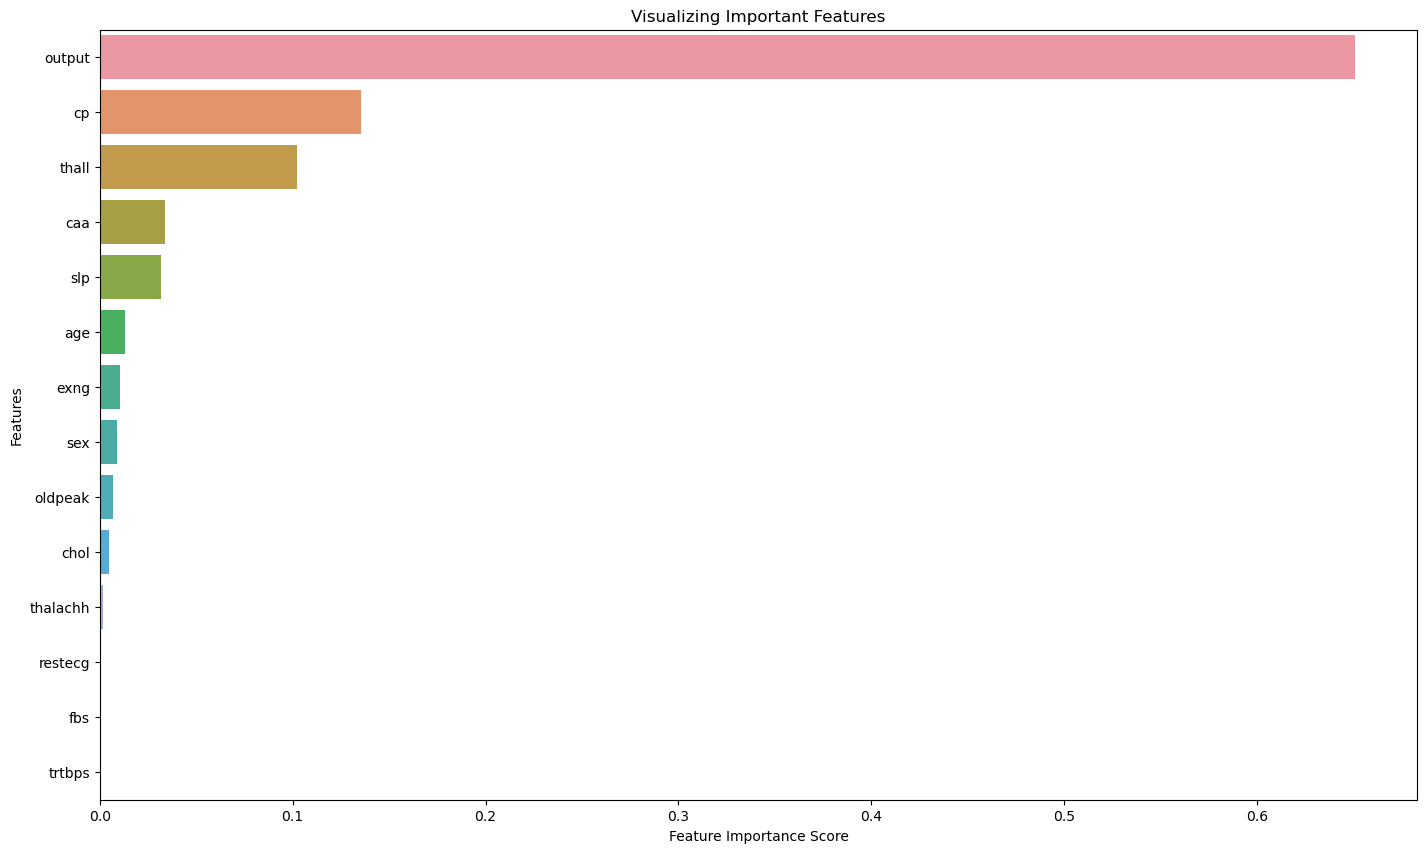

XgBoost test Accuracy: 1.0
XgBoost test F1 Score
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        30

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



In [22]:
xGboost_flow(heart_attack_X_train, heart_attack_X_test, heart_attack_y_train, heart_attack_y_test)

## Heart attacks probability classification
Here we do not have special data, so we'll take the treshold a bit lower than mean values.

In [23]:
import pandas as pd
from sklearn.preprocessing import Binarizer

# Select only positive cases
positive_cases = heart_attack_data[heart_attack_data['output'] == 1]

# Binarization based on the reduced median value of each feature for positive cases
for column in heart_attack_data.columns:
    # Check if the column is numerical
    if heart_attack_data[column].dtype in ['float64', 'int64']:
        # Compute the median value for positive cases only
        median_value = positive_cases[column].median()
        # Reduce the median value slightly (e.g., by 0.07 or 7%)
        reduced_median = median_value * 0.93

        # Apply Binarizer with the reduced median as the threshold
        heart_attack_data[column] = Binarizer(threshold=reduced_median).fit_transform(heart_attack_data[[column]])

# Removing features with low importance
low_importance_features = ['trtbps']
heart_attack_data = heart_attack_data.drop(low_importance_features, axis=1)

# Convert to boolean type
heart_attack_data = heart_attack_data.astype(bool)

# Splitting the dataset into features and target variable
heart_attack_target = heart_attack_data['output']
heart_attack_data = heart_attack_data.drop(columns=['output'], axis=1)

# Splitting the data into training and test sets
heart_attack_X_train, heart_attack_X_test, heart_attack_y_train, heart_attack_y_test = train_test_split(heart_attack_data, heart_attack_target, test_size=0.3)

In [24]:
heart_attack_X_train.shape, heart_attack_X_train, heart_attack_X_train.isnull().sum()

((212, 12),
        age    sex     cp   chol    fbs  restecg  thalachh   exng  oldpeak  \
 153   True  False   True   True  False    False      True  False    False   
 121   True   True  False   True  False    False      True  False    False   
 8     True   True   True  False   True     True      True  False     True   
 169   True   True  False  False   True    False      True   True     True   
 86    True   True   True   True  False     True      True  False     True   
 ..     ...    ...    ...    ...    ...      ...       ...    ...      ...   
 42   False   True  False  False  False    False     False   True     True   
 293   True   True   True  False  False    False      True  False     True   
 2    False  False  False  False  False    False      True  False     True   
 154  False  False   True   True  False     True      True  False    False   
 22   False   True  False   True  False     True      True  False    False   
 
        slp    caa  thall  
 153  False   True   T

In [25]:
fcals_performer(heart_attack_X_train, heart_attack_y_train, heart_attack_X_test, heart_attack_y_test, alphas=[0.5, 0.6, 0.7, 0.8, 0.9])

Fold 1
Accuracy for fold 1 is 0.70 

F1 Score for fold 1 is 0.67 

Fold 2
Accuracy for fold 2 is 0.56 

F1 Score for fold 2 is 0.55 

Fold 3
Accuracy for fold 3 is 0.70 

F1 Score for fold 3 is 0.65 

Fold 4
Accuracy for fold 4 is 0.72 

F1 Score for fold 4 is 0.72 

Fold 5
Accuracy for fold 5 is 0.80 

F1 Score for fold 5 is 0.79 

Accuracy for fcalc(method=standard, alpha=0.5): 0.6948837209302325
F1 Score for fcalc(method=standard, alpha=0.5): 0.676365621295597
Fold 1
Accuracy for fold 1 is 0.58 

F1 Score for fold 1 is 0.50 

Fold 2
Accuracy for fold 2 is 0.49 

F1 Score for fold 2 is 0.31 

Fold 3
Accuracy for fold 3 is 0.67 

F1 Score for fold 3 is 0.41 

Fold 4
Accuracy for fold 4 is 0.70 

F1 Score for fold 4 is 0.70 

Fold 5
Accuracy for fold 5 is 0.70 

F1 Score for fold 5 is 0.47 

Accuracy for fcalc(method=standard, alpha=0.6): 0.6283720930232558
F1 Score for fcalc(method=standard, alpha=0.6): 0.47732766729064896
Fold 1
Accuracy for fold 1 is 0.53 

F1 Score for fold 1 is 0.

## Conclusions
We have achieved really good results. Our macro f1-score and accuracy are really good) 
And an interesting thing that taking the tresholds from articles showed poorer results than my idea to take the median value reduced slightly by 7%.

## Wine quality data analysis:

In [27]:
binarizer = Binarizer(threshold=5)
le = LabelEncoder()

quality_of_wine_new_data = quality_of_wine_data
quality_of_wine_new_target = binarizer.transform(quality_of_wine_data['quality'].values.reshape(-1,1))
quality_of_wine_new_data['Type'] = le.fit_transform(quality_of_wine_data['Type'])

quality_of_wine_new_data = quality_of_wine_new_data.drop(columns = ['quality'], axis = 1)

quality_of_wine_X_train, quality_of_wine_X_test, quality_of_wine_y_train, quality_of_wine_y_test = train_test_split(quality_of_wine_new_data, quality_of_wine_new_target, test_size=.2)

accuracy mean value: 0.9934585488727589
accuracy STD value: 0.0006080695184573847
accuracy mean value: 0.9936509749794237
accuracy STD value: 0.000980667677927913
accuracy mean value: 0.993689421702209
accuracy STD value: 0.0010841056655124352
accuracy mean value: 0.9934200799392731
accuracy STD value: 0.000636571273570452
accuracy mean value: 0.9936509157508887
accuracy STD value: 0.0010034794161978815
accuracy mean value: 0.9931891923026892
accuracy STD value: 0.0010221986439513705
accuracy mean value: 0.9915345321238174
accuracy STD value: 0.001596082733712776
accuracy mean value: 0.9844543234350358
accuracy STD value: 0.0018189932359897623
accuracy mean value: 0.966022817941182
accuracy STD value: 0.003117513282641798
accuracy mean value: 0.9183084952302151
accuracy STD value: 0.0025120288111852734
Feature importances:
alcohol: 0.18744701147079468
Type: 0.13887175917625427
volatile acidity: 0.10539201647043228
sulphates: 0.06707189232110977
total sulfur dioxide: 0.06331904232501984

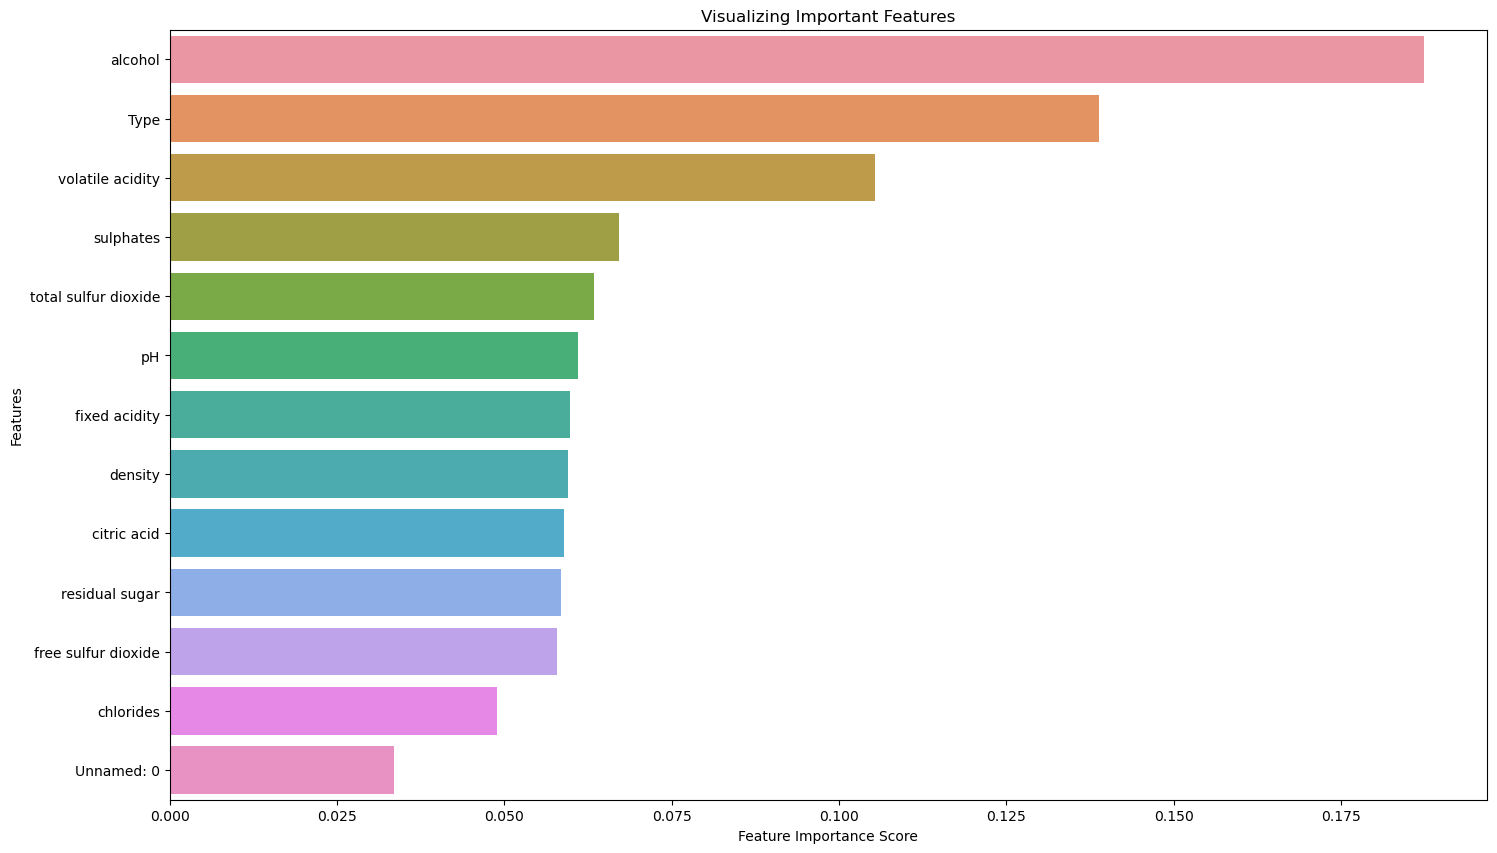

XgBoost test Accuracy: 0.9970755733415423
XgBoost test F1 Score
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2501
           1       1.00      1.00      1.00      3996

    accuracy                           1.00      6497
   macro avg       1.00      1.00      1.00      6497
weighted avg       1.00      1.00      1.00      6497



In [28]:
xGboost_flow(quality_of_wine_X_train, quality_of_wine_X_test, quality_of_wine_y_train, quality_of_wine_y_test)

## Wine quality probability classification
I have found the article with correct tresholds for this dataset, so we'll use them

In [29]:
quality_of_wine_data['fixed acidity'] = Binarizer(threshold=6.5).fit_transform([quality_of_wine_data['fixed acidity']])[0]
quality_of_wine_data['volatile acidity'] = Binarizer(threshold=0.3).fit_transform([quality_of_wine_data['volatile acidity']])[0]
quality_of_wine_data['density'] = Binarizer(threshold=0.9935).fit_transform([quality_of_wine_data['density']])[0]
quality_of_wine_data['sulphates'] = Binarizer(threshold=0.45).fit_transform([quality_of_wine_data['sulphates']])[0]
quality_of_wine_data['alcohol'] = Binarizer(threshold=11.3).fit_transform([quality_of_wine_data['alcohol']])[0]
quality_of_wine_data['Type'] = LabelEncoder().fit_transform(quality_of_wine_data['Type'])
quality_of_wine_data['quality'] = Binarizer(threshold=5).fit_transform([quality_of_wine_data['quality']])[0]
quality_of_wine_data = quality_of_wine_data.drop(['Unnamed: 0', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'chlorides', 'total sulfur dioxide', 'pH'], axis=1)

In [30]:
quality_of_wine_data = quality_of_wine_data.astype(bool)

quality_of_wine_target = quality_of_wine_data['quality']
quality_of_wine_data = quality_of_wine_data.drop(columns = ['quality'], axis = 1)

# Splitting the data
_, quality_of_wine_data, _, quality_of_wine_target = train_test_split(quality_of_wine_data, quality_of_wine_target, test_size=.15)
quality_of_wine_X_train, quality_of_wine_X_test, quality_of_wine_y_train, quality_of_wine_y_test = train_test_split(quality_of_wine_data, quality_of_wine_target, test_size=.3)

In [33]:
# Correction check
quality_of_wine_X_train.isna().any().any()

False

In [32]:
fcals_performer(quality_of_wine_X_train, quality_of_wine_y_train, quality_of_wine_X_test, quality_of_wine_y_test, alphas=[0.5, 0.6, 0.7, 0.8, 0.9])

Fold 1
Accuracy for fold 1 is 0.46 

F1 Score for fold 1 is 0.29 

Fold 2
Accuracy for fold 2 is 0.44 

F1 Score for fold 2 is 0.28 

Fold 3
Accuracy for fold 3 is 0.48 

F1 Score for fold 3 is 0.30 

Fold 4
Accuracy for fold 4 is 0.48 

F1 Score for fold 4 is 0.31 

Fold 5
Accuracy for fold 5 is 0.45 

F1 Score for fold 5 is 0.28 

Accuracy for fcalc(method=standard, alpha=0.5): 0.46201782398971875
F1 Score for fcalc(method=standard, alpha=0.5): 0.29180758872141693
Fold 1
Accuracy for fold 1 is 0.52 

F1 Score for fold 1 is 0.34 

Fold 2
Accuracy for fold 2 is 0.46 

F1 Score for fold 2 is 0.30 

Fold 3
Accuracy for fold 3 is 0.49 

F1 Score for fold 3 is 0.32 

Fold 4
Accuracy for fold 4 is 0.52 

F1 Score for fold 4 is 0.34 

Fold 5
Accuracy for fold 5 is 0.46 

F1 Score for fold 5 is 0.29 

Accuracy for fcalc(method=standard, alpha=0.6): 0.4877951168392068
F1 Score for fcalc(method=standard, alpha=0.6): 0.31607276421819874
Fold 1
Accuracy for fold 1 is 0.59 

F1 Score for fold 1 is

## Conclusions
We have achieved not so good results. Our macro f1-score and accuracy aren't so good.
Here I considered to take the tresholds from the article and to reduce the data as it took too much time to complete the function on the whole dataset. 
Maybe the quality of our results is due to the fact that the dataset was trimmed.

## Data scientists job change data analysis:

In [34]:
le = LabelEncoder()

data_scientists_job_change_target_new = data_scientists_job_change_target
data_scientists_job_change_target_new = data_scientists_job_change_data_new['target']
data_scientists_job_change_data_new = data_scientists_job_change_data_new.drop(columns = ['target'], axis = 1)

for col in data_scientists_job_change_data_new.columns:
    le.fit(data_scientists_job_change_data_new[col])
    data_scientists_job_change_data_new[col] = le.transform(data_scientists_job_change_data_new[col])

data_scientists_job_change_X_train, data_scientists_job_change_X_test, data_scientists_job_change_y_train, data_scientists_job_change_y_test = train_test_split(data_scientists_job_change_data_new, data_scientists_job_change_target_new, test_size=.2)

accuracy mean value: 0.7639306864000154
accuracy STD value: 0.006017214303084463
accuracy mean value: 0.7683024574105939
accuracy STD value: 0.004079646860118068
accuracy mean value: 0.7661495175736834
accuracy STD value: 0.00486483478054531
accuracy mean value: 0.7692810586881963
accuracy STD value: 0.004831826930823205
accuracy mean value: 0.7718911303152292
accuracy STD value: 0.006261964200896017
accuracy mean value: 0.7758712139350814
accuracy STD value: 0.004374550702786654
accuracy mean value: 0.7766539928000519
accuracy STD value: 0.002175946776091714
accuracy mean value: 0.7812217139196512
accuracy STD value: 0.004860604316154283
accuracy mean value: 0.7859850446245673
accuracy STD value: 0.005935436820692812
accuracy mean value: 0.7870291328670287
accuracy STD value: 0.006685209384272662
Feature importances:
company_type_nom: 0.16840273141860962
city_development_index: 0.16325029730796814
major_discipline_nom: 0.10118930041790009
enrolled_university_nom: 0.07675312459468842
r

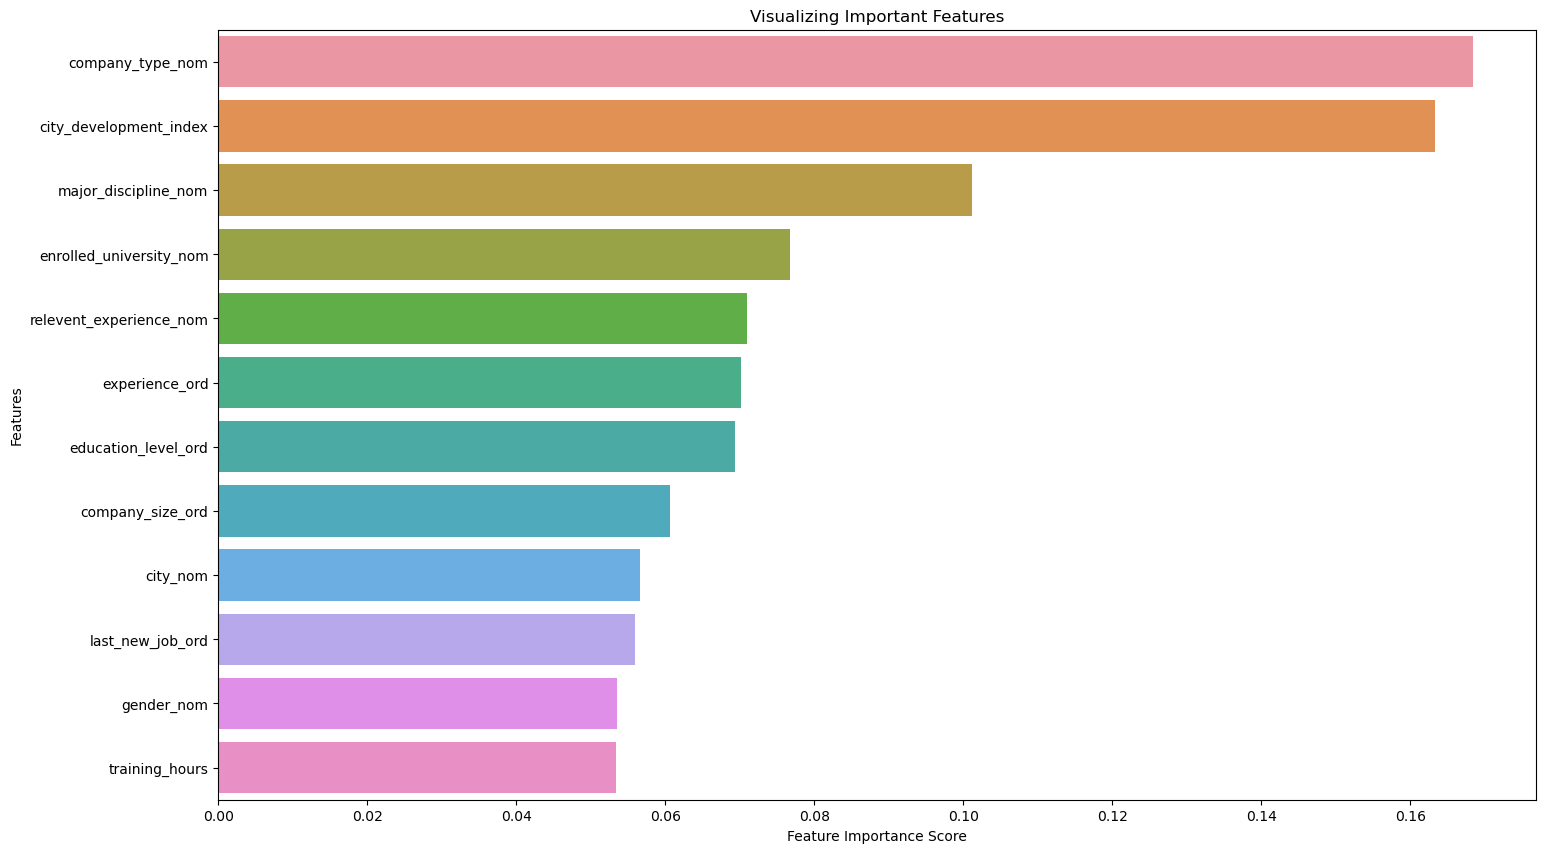

XgBoost test Accuracy: 0.7698329853862212
XgBoost test F1 Score
:               precision    recall  f1-score   support

         0.0       0.83      0.88      0.85      2877
         1.0       0.55      0.44      0.49       955

    accuracy                           0.77      3832
   macro avg       0.69      0.66      0.67      3832
weighted avg       0.76      0.77      0.76      3832



In [35]:
xGboost_flow(data_scientists_job_change_X_train, data_scientists_job_change_X_test, data_scientists_job_change_y_train, data_scientists_job_change_y_test)

## Data scientists job change probability classification
Here we do not have special data, so we'll take the treshold a bit lower than mean values.

In [79]:
import pandas as pd
from sklearn.preprocessing import Binarizer

# Select only positive cases
positive_cases = data_scientists_job_change_data[data_scientists_job_change_data['target'] == 1]

# Binarization based on the reduced median value of each feature for positive cases
for column in data_scientists_job_change_data.columns:
    # Check if the column is numerical
    if data_scientists_job_change_data[column].dtype in ['float64', 'int64']:
        # Compute the median value for positive cases only
        median_value = positive_cases[column].median()
        # Reduce the median value slightly (e.g., by 0.07 or 7%)
        reduced_median = median_value * 0.93

        # Apply Binarizer with the reduced median as the threshold
        data_scientists_job_change_data[column] = Binarizer(threshold=reduced_median).fit_transform(data_scientists_job_change_data[[column]])

# No features with low importance

# Convert to boolean type
data_scientists_job_change_data = data_scientists_job_change_data.astype(bool)

# Splitting the dataset into features and target variable
data_scientists_job_change_data_target = data_scientists_job_change_data['target']
data_scientists_job_change_data = data_scientists_job_change_data.drop(columns=['target'], axis=1)

# Splitting the data into training and test sets
_, data_scientists_job_change_data, _, data_scientists_job_change_target = train_test_split(data_scientists_job_change_data, data_scientists_job_change_data_target, test_size=.12)
data_scientists_job_change_X_train, data_scientists_job_change_X_test, data_scientists_job_change_y_train, data_scientists_job_change_data_y_test = train_test_split(data_scientists_job_change_data, data_scientists_job_change_target, test_size=0.3)

In [80]:
fcals_performer(data_scientists_job_change_X_train, data_scientists_job_change_y_train, data_scientists_job_change_X_test, data_scientists_job_change_data_y_test, alphas=[0.5, 0.6, 0.7, 0.8, 0.9])

Fold 1
Accuracy for fold 1 is 0.70 

F1 Score for fold 1 is 0.39 

Fold 2
Accuracy for fold 2 is 0.73 

F1 Score for fold 2 is 0.37 

Fold 3
Accuracy for fold 3 is 0.74 

F1 Score for fold 3 is 0.62 

Fold 4
Accuracy for fold 4 is 0.70 

F1 Score for fold 4 is 0.38 

Fold 5
Accuracy for fold 5 is 0.74 

F1 Score for fold 5 is 0.58 

Accuracy for fcalc(method=standard, alpha=0.5): 0.7197113058957838
F1 Score for fcalc(method=standard, alpha=0.5): 0.46888105355996734
Fold 1
Accuracy for fold 1 is 0.60 

F1 Score for fold 1 is 0.37 

Fold 2
Accuracy for fold 2 is 0.61 

F1 Score for fold 2 is 0.36 

Fold 3
Accuracy for fold 3 is 0.62 

F1 Score for fold 3 is 0.58 

Fold 4
Accuracy for fold 4 is 0.54 

F1 Score for fold 4 is 0.34 

Fold 5
Accuracy for fold 5 is 0.59 

F1 Score for fold 5 is 0.55 

Accuracy for fcalc(method=standard, alpha=0.6): 0.5916719877711345
F1 Score for fcalc(method=standard, alpha=0.6): 0.43936161628786835
Fold 1
Accuracy for fold 1 is 0.34 

F1 Score for fold 1 is 

## Conclusions
We have achieved rather good results. Our  is good enough but macro f1-score is not as good as possible, which means that this template isn't really stable at classification.
And an interesting thing that taking the tresholds from articles showed poorer results than my idea to take the median value reduced slightly by 7%.